In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from sklearn import metrics

In [2]:
df1 = pd.read_csv('DS2_C6_S4_CarSales_Data_Challenge.csv')

In [3]:
df1.drop(['__year_resale_value','Latest_Launch'],axis=1, inplace = True)
df1.dropna(inplace = True)
df=df1.copy()
df.head()

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,Acura,Integra,16.919,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150
1,Acura,TL,39.384,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778
3,Acura,RL,8.588,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779
4,Audi,A4,20.397,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639
5,Audi,A6,18.780,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105


In [4]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [5]:
df['Manufacturer'] = label_encoder.fit_transform(df['Manufacturer'])
df['Model'] = label_encoder.fit_transform(df['Model'])
df['Vehicle_type'] = label_encoder.fit_transform(df['Vehicle_type'])

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

# TASK2

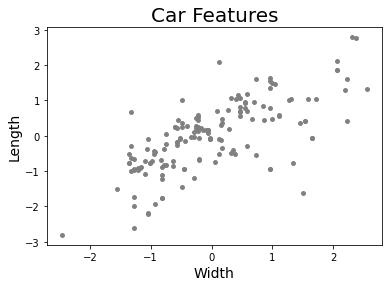

In [8]:
plt.scatter(scaled_df['Width'], scaled_df['Length'],s=15,color='grey')
plt.title('Car Features',fontsize=20)
plt.xlabel('Width',fontsize=14)
plt.ylabel('Length',fontsize=14)
plt.show()

In [9]:
T1 = scaled_df.iloc[:,8:10]
T2 = df.iloc[:,8:10]
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.35, min_samples=11)
dbscan.fit(T1)
dbscan.labels_

array([ 0,  0,  0,  0, -1,  1,  0,  0,  0,  1,  1, -1,  1, -1, -1,  0, -1,
        0,  0,  1,  1, -1, -1,  0, -1,  1,  0,  0, -1,  0, -1,  1, -1,  0,
        0, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  1,  0, -1,  0, -1, -1,
       -1, -1,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0, -1, -1, -1,  0,  0,
        0,  1, -1, -1, -1, -1, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  1,
       -1,  0, -1,  0,  0,  1, -1, -1, -1,  0,  1, -1,  0,  0,  0, -1,  0,
       -1, -1,  0,  0, -1,  0,  1, -1,  0, -1, -1,  0,  0, -1,  1,  1,  1,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1, -1,  0, -1, -1,  0,  0, -1, -1, -1,  0,  0,  0,  0,  0, -1],
      dtype=int64)

C:\Users\yogesh\AppData\Local\Temp\ipykernel_5040\1659706322.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T1['DBSCAN_labels']=dbscan.labels_


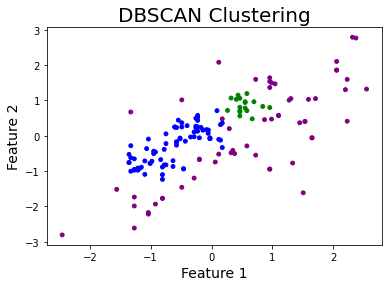

In [10]:
colors=['purple','red','blue','green']
T1['DBSCAN_labels']=dbscan.labels_
# Plotting resulting clusters
plt.scatter(T1.iloc[:,0],T1.iloc[:,1],c=T1['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

#### From the above Alogorithm we can see that there is two cluster and rest data points are noise

# TASK3

In [11]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(T2)
distances, indices = nbrs.kneighbors(T2)

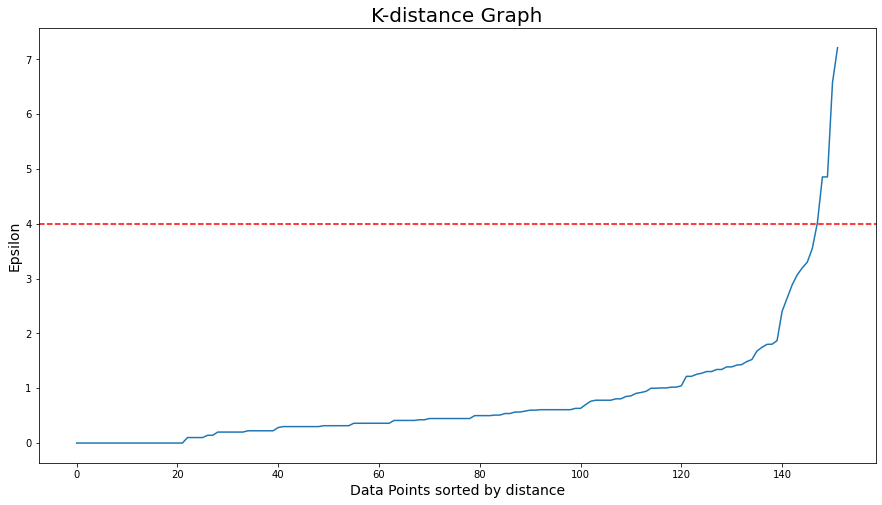

In [12]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=4, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [13]:
eps=4
for min_samples in range(2, 10,1):
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(T2)
    x= cluster_labels +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)

eps= 4 | min_samples=  2 | obtained clustering:  [(1, 5), (2, 143), (3, 2), (4, 2)]
eps= 4 | min_samples=  3 | obtained clustering:  [(1, 9), (2, 143)]
eps= 4 | min_samples=  4 | obtained clustering:  [(1, 9), (2, 136), (3, 7)]
eps= 4 | min_samples=  5 | obtained clustering:  [(1, 12), (2, 128), (3, 4), (4, 8)]
eps= 4 | min_samples=  6 | obtained clustering:  [(1, 16), (2, 128), (3, 8)]
eps= 4 | min_samples=  7 | obtained clustering:  [(1, 18), (2, 127), (3, 7)]
eps= 4 | min_samples=  8 | obtained clustering:  [(1, 25), (2, 127)]
eps= 4 | min_samples=  9 | obtained clustering:  [(1, 31), (2, 121)]


# TASK4

In [14]:
dbscan_opt=DBSCAN(eps=4, min_samples=4)
dbscan_opt.fit(T2)
dbscan_opt.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [15]:
T2['DBSCAN_opt_labels']=dbscan_opt.labels_
T2['DBSCAN_opt_labels'].value_counts()

 0    136
-1      9
 1      7
Name: DBSCAN_opt_labels, dtype: int64

Silhouette Coefficient: 0.339


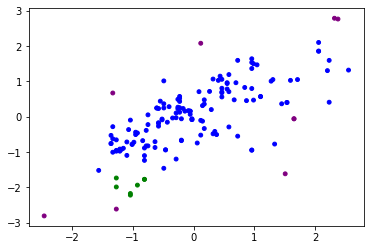

In [16]:
plt.scatter(T1.iloc[:,0],T1.iloc[:,1], c=T2['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(T2, T2['DBSCAN_opt_labels']))

In [17]:
dbscan_opt=DBSCAN(eps=4, min_samples=4)
dbscan_opt.fit(T2)
dbscan_opt.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [18]:
T2['DBSCAN_opt_labels']=dbscan_opt.labels_
T2['DBSCAN_opt_labels'].value_counts()

 0    136
-1      9
 1      7
Name: DBSCAN_opt_labels, dtype: int64

Silhouette Coefficient: 0.339


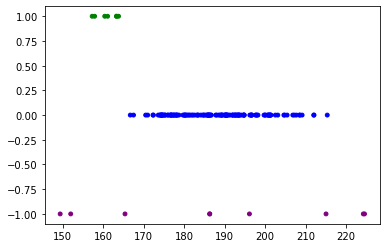

In [19]:
plt.scatter(T2.iloc[:,1],T2.iloc[:,2], c=T2['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(T2, T2['DBSCAN_opt_labels']))

# Interactive

In [31]:
dbscan_opt=DBSCAN(eps=4, min_samples=4)
dbscan_opt.fit(scaled_df)
scaled_df['DBSCAN_opt_labels']=dbscan_opt.labels_


%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(F1,F2):
    colors=['purple','red','blue','green']

    plt.figure(figsize=(15,7))

    plt.scatter(scaled_df.iloc[:,F1],scaled_df.iloc[:,F2], c=scaled_df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(scaled_df, scaled_df['DBSCAN_opt_labels']))

interactive_plot = interactive(f, F1=(0, 14,1), F2=(0, 14, 1))
output = interactive_plot.children[-1]
output.layout.height = '550px'
interactive_plot

interactive(children=(IntSlider(value=7, description='F1', max=14), IntSlider(value=7, description='F2', max=1…

In [32]:
scaled_df.DBSCAN_opt_labels.unique()

array([ 0, -1], dtype=int64)